# Audio Data

## Sampling and sampling rate

Sampling is the process of measuring the value of a continuous signal at fixed time steps. The sampled waveform is discrete, since it contains a finite number of signal values at uniform intervals.


<img src="figures/Signal_Sampling.png" title="Signal_Sampling" style="width: 640px;" />

The sampling rate (also called sampling frequency) is the number of samples taken in one second and is measured in hertz (Hz). 
- To give you a point of reference, CD-quality audio has a sampling rate of 44,100 Hz, meaning samples are taken 44,100 times per second. 
- For comparison, high-resolution audio has a sampling rate of 192,000 Hz or 192 kHz. 
- A common sampling rate used in training speech models is 16,000 Hz or 16 kHz.

## Audio as a waveform

In [13]:
import librosa
from IPython.display import Audio
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

Audio(array, rate=sampling_rate)

/var/folders/yg/7zr68xws2x5d3vc4nhz2l7wc0000gn/T/ipykernel_90508/2481016707.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(array, sr=sampling_rate, x_axis='s')


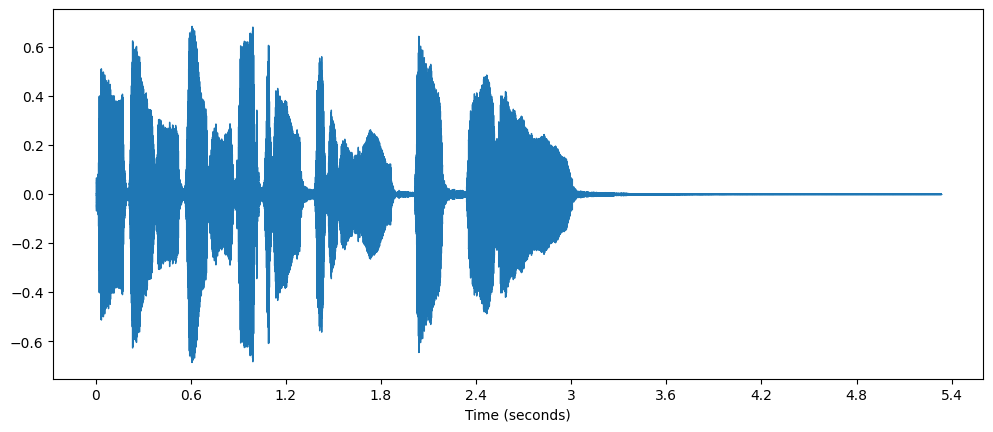

In [15]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate, x_axis='s')

## The frequency spectrum

Another way to visualize audio data is to plot the frequency spectrum of an audio signal, also known as `the frequency domain representation`. 
- The spectrum is computed using `the discrete Fourier transform or DFT`. It describes the individual frequencies that make up the signal and how strong they are.

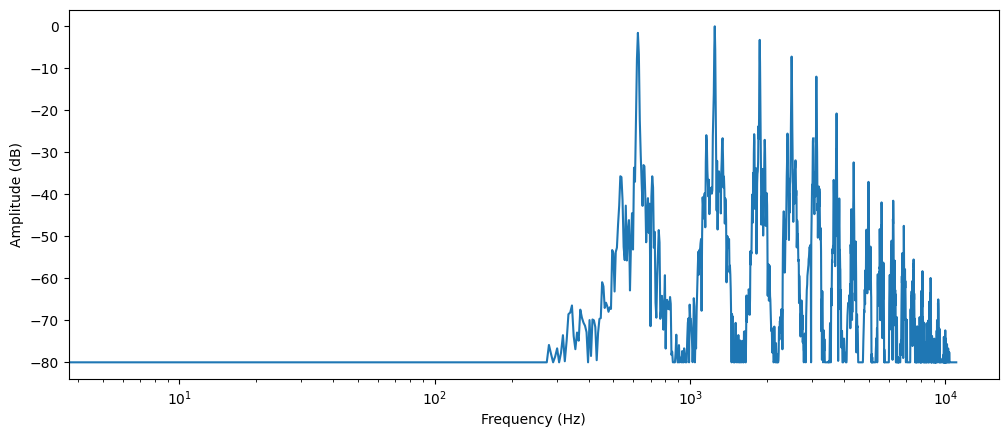

In [17]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

## Spectrogram

What if we want to see how the frequencies in an audio signal change? The trumpet plays several notes and they all have different frequencies. The problem is that the spectrum only shows a frozen snapshot of the frequencies at a given instant. The solution is to take multiple DFTs, each covering only a small slice of time, and stack the resulting spectra together into a spectrogram.

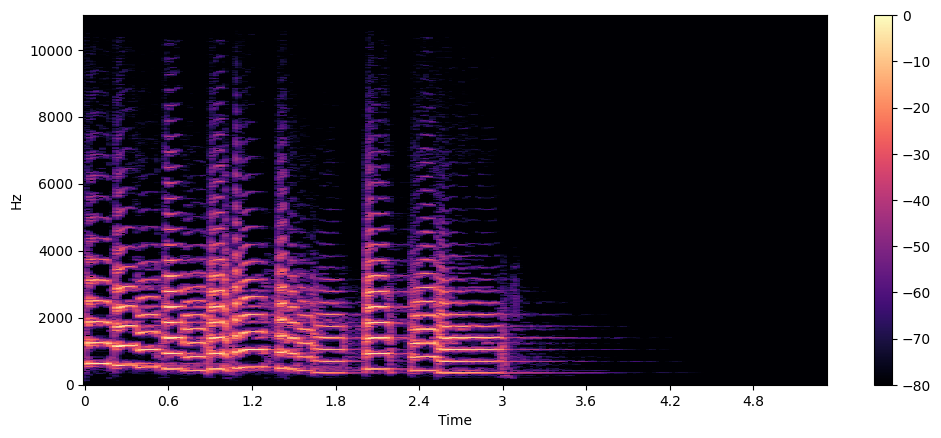

In [18]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

## Mel spectrogram

A mel spectrogram is a variation of the spectrogram that is commonly used in speech processing and machine learning tasks. It is similar to a spectrogram in that it shows the frequency content of an audio signal over time, but on a different frequency axis.

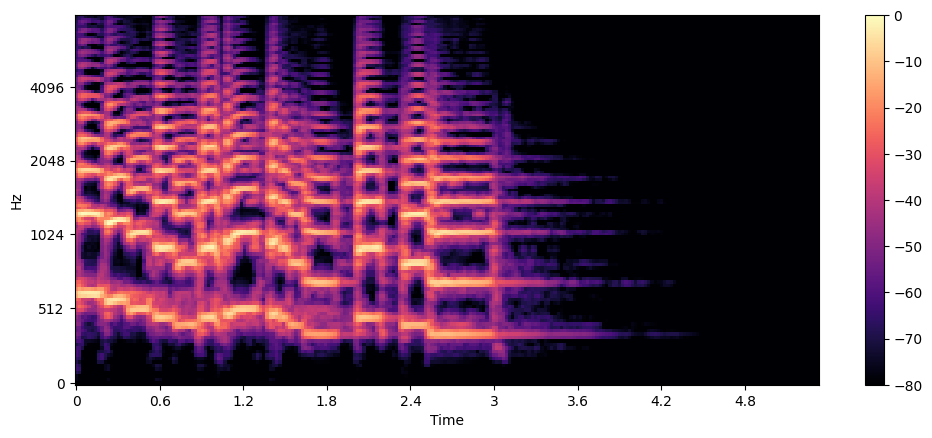

In [19]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()